In [132]:
# Librerias generales
import pandas as pd
import numpy as np
import sqlite3 as sql ### para conectarse a BD
from sklearn.impute import SimpleImputer
import plotly.express as px


# Librerias e visualización
import seaborn as sns
import matplotlib
##matplotlib.use('TkAgg')
%matplotlib notebook
matplotlib.use('agg')
import matplotlib.pyplot as plt
#from ydata_profiling  import ProfileReport

NOTA: SE CAMBIAN TODAS LAS FECHAS DESDE EL FORMATO DE EXCEL

In [133]:
###Lectura base de asegurados expuestos
df = pd.read_csv('BD_Asegurados_Expuestos.csv', sep = ';')
df.head(10)

Asegurado_Id  Poliza_Id FECHA_INICIO FECHA_CANCELACION   FECHA_FIN
0       1213170  113307876    1/09/2019               NaN  15/12/2019
1      22248110  195410143    1/09/2019        31/12/2019  31/12/2019
2       7212095  192799506    1/09/2019        31/12/2019  31/12/2019
3      23743715  145500123    1/09/2019        31/12/2019  31/12/2019
4      57822199  175415440    1/09/2019        31/12/2019  31/12/2019
5      39914668  204291309    1/12/2019         1/12/2019   1/12/2019
6       5514589   50872086    1/09/2019               NaN  31/12/2019
7       5757374   90964098    1/09/2019               NaN  31/12/2019
8      29767620   65844839    1/09/2019               NaN  31/12/2019
9      54772438  199065788   14/09/2019               NaN  31/12/2019

In [134]:
##Gráfico para observar la base de datos asegurados expuestos de una forma global
# ProfileReport(df, title='Reporte de base asegurados expuestos', minimal=True, 
#               progress_bar=False, interactions=None, explorative=True, dark_mode=True, 
#               notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, 
#               missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [135]:
###Lectura base socio demograficas
df1 = pd.read_csv('BD_SocioDemograficas.csv', sep = ';')
df1.head(2)

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\442322809.py:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



Afiliado_Id  Sexo_Cd FechaNacimiento Regional  CANCER  EPOC  DIABETES  \
0       738288        2       8/11/1976       40       0     0         0   
1       738294        2      16/01/1964       50       0     0         0   

   HIPERTENSION  ENF_CARDIOVASCULAR  
0             0                   0  
1             0                   0

In [136]:
##Gráfico para observar la base socio demograficas expuestos de una forma global
# ProfileReport(df1, title='Reporte de datos sociodemograficos', minimal=True, 
#               progress_bar=False, interactions=None, explorative=True, dark_mode=True, 
#               notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, 
#               missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [137]:
###Lectura base de utilizaciones medicas
df2 = pd.read_csv('BD_UtilizacionesMedicas.csv', sep = ';')
df2.head(2)

Fecha_Reclamacion  Afiliado_Id Reclamacion_Cd Diagnostico_Codigo  \
0        28/10/2019      2668445            R10                  9   
1        30/09/2019      4370072            R15                  9   

   Numero_Utilizaciones  Valor_Utilizaciones  
0                     1                46500  
1                     2                42408

In [138]:
##Gráfico para observar la base de datos utilizaciones  de una forma global
# ProfileReport(df2, title='Reporte de base utilizaciones medicas', minimal=True, 
#               progress_bar=False, interactions=None, explorative=True, dark_mode=True, 
#               notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, 
#               missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [139]:
df3 = pd.read_csv('BD_Diagnostico.csv', sep = ';')
df3.head(2)

Diagnostico_Codigo                       Diagnostico_Desc
0                  9                  DIAGNÓSTICO PENDIENTE
1               N649  TRASTORNO DE LA MAMA, NO ESPECIFICADO

In [140]:
df4 = pd.read_csv('BD_Reclamaciones.csv', sep = ';')
df4.head(2)

Reclamacion_Desc Reclamacion_Cd
0      ANEXO EXEQUIAL             R1
1  ATENCION DEL PARTO             R2

In [141]:
df5 = pd.read_csv('BD_Regional.csv', sep = ';')
df5.head(2)

Regional_Id       Regional_desc
0           10  REGIONAL ANTIOQUIA
1           20     REGIONAL CENTRO

##BASE DE DATOS ASEGURADOS EXPUESTOS

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231520 entries, 0 to 231519
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Asegurado_Id       231520 non-null  int64 
 1   Poliza_Id          231520 non-null  int64 
 2   FECHA_INICIO       231520 non-null  object
 3   FECHA_CANCELACION  104808 non-null  object
 4   FECHA_FIN          231520 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.8+ MB


In [143]:
## Se transforman todas las fechas a formato fecha
df['FECHA_INICIO'] = pd.to_datetime(df['FECHA_INICIO'])
df['FECHA_CANCELACION'] = pd.to_datetime(df['FECHA_CANCELACION'])
df['FECHA_FIN'] = pd.to_datetime(df['FECHA_FIN'])

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '31/12/2019' in DD/MM/YYYY format. Pro

In [144]:
df.isnull().sum()

Asegurado_Id              0
Poliza_Id                 0
FECHA_INICIO              0
FECHA_CANCELACION    126712
FECHA_FIN                 0
dtype: int64

Los nulos anteriores de la fecha cancelación se dan porque el usuario aún no ha cancelado el seguro.

In [145]:
fila_igual = df[(df['FECHA_INICIO'] == df['FECHA_CANCELACION'])]

In [146]:
total=len(fila_igual)

In [147]:
##Esto sucede por un error al realizar la compra o porque compro el que no era
print('La cantidad de veces en que los usuarios ha comprado el seguro y lo ha cancelado el mismo dia es de: ', total)

La cantidad de veces en que los usuarios ha comprado el seguro y lo ha cancelado el mismo dia es de:  3234


In [148]:
usuarios=df['Asegurado_Id'].nunique()

In [149]:
print('La cantidad de usuarios unicos que compran el seguro es de: ',usuarios)

La cantidad de usuarios unicos que compran el seguro es de:  225763


##BASE DE DATOS SOCIODEMOGRAFICOS

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225776 entries, 0 to 225775
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Afiliado_Id         225776 non-null  int64 
 1   Sexo_Cd             225776 non-null  int64 
 2   FechaNacimiento     225776 non-null  object
 3   Regional            225776 non-null  object
 4   CANCER              225776 non-null  int64 
 5   EPOC                225776 non-null  int64 
 6   DIABETES            225776 non-null  int64 
 7   HIPERTENSION        225776 non-null  int64 
 8   ENF_CARDIOVASCULAR  225776 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 15.5+ MB


In [151]:
df1['FechaNacimiento'] = pd.to_datetime(df1['FechaNacimiento'])

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '16/01/1964' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '28/05/1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '18/03/1941' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '21/07/1975' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '23/11/1927' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '30/05/1964' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '27/09/1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '21/01/1966' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '23/08/1951' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\gabri\AppData\Local\Temp\ipykernel_11868\3892125182.py:1: UserWarning:

Parsing '16/04/1975' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [152]:
df1.isnull().sum()

Afiliado_Id           0
Sexo_Cd               0
FechaNacimiento       0
Regional              0
CANCER                0
EPOC                  0
DIABETES              0
HIPERTENSION          0
ENF_CARDIOVASCULAR    0
dtype: int64

In [153]:
df1['Sexo_Cd']=df1['Sexo_Cd'].replace({1: 'F', 2:'M',-1:'F'})

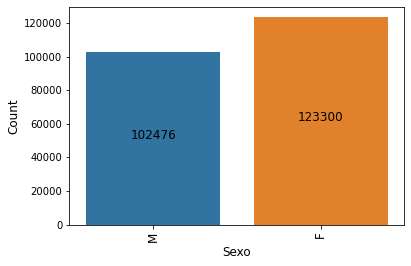

In [154]:
## Gráfico para ver la distribución sexo
%matplotlib inline
ax = sns.countplot(x='Sexo_Cd',   data= df1)
plt.xlabel('Sexo', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', size=12)
    
plt.show()

De acuerdo al gráfico anterior se puede observar que el sexo femenino es el que mas accede a seguros de salud comparado con el sexo masculino.

In [155]:
casos_cancer= df1['CANCER'].sum()
casos_epoc= df1['EPOC'].sum()
casos_diabetes= df1['DIABETES'].sum()
casos_hipertension= df1['HIPERTENSION'].sum()
casos_cardiovascular= df1['ENF_CARDIOVASCULAR'].sum()


In [156]:
# Calcular el total de casos
total_casos = casos_cancer + casos_diabetes + casos_epoc + casos_hipertension + casos_cardiovascular

# Calcular los porcentajes
porcentaje_cancer = (casos_cancer / total_casos) * 100
porcentaje_diabetes = (casos_diabetes / total_casos) * 100
porcentaje_epoc = (casos_epoc / total_casos) * 100
porcentaje_hipertension = (casos_hipertension / total_casos) * 100
porcentaje_cardiovascular = (casos_cardiovascular / total_casos) * 100

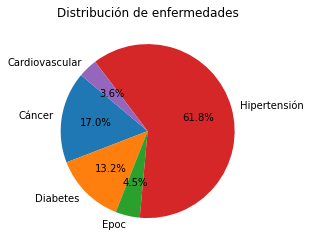

In [157]:
%matplotlib inline
enfermedades = ['Cáncer', 'Diabetes', 'Epoc','Hipertensión','Cardiovascular']
porcentajes = [porcentaje_cancer, porcentaje_diabetes, porcentaje_epoc,porcentaje_hipertension,porcentaje_cardiovascular]  # Puedes ajustar estos porcentajes según tus datos

# Crear el gráfico de torta
plt.pie(porcentajes, labels=enfermedades, autopct='%1.1f%%', startangle=140)

# Añadir un título
plt.title('Distribución de enfermedades')

# Mostrar el gráfico
plt.show()

Según el gráfico circular anterior, la enfermedad que tiene más de la mitad de las personas que tienen el seguro es la hipertensión y la que menos padecen son enfermedades cardiovasculares. 

In [158]:
df1['Regional']=df1['Regional'].astype('str')

In [159]:
df1['Regional']=df1['Regional'].replace({'50': 'Occidente', '40':'Norte','30':'Eje cafetero','20':'Centro','10':'Antioquia','-1':'Sin info','#N/D':'Sin info'})

In [160]:
df1 = df1.drop(df1[df1['Regional'] == 'Sin info'].index)

In [161]:
df_reg = df1.groupby(['Regional']).agg(encounters = ('Afiliado_Id', 'count')).reset_index().sort_values(['encounters'], ascending = False)

In [162]:
#Gráfico para ver como estan distribuidas las personas que tienen el seguro por región
fig = px.treemap(df_reg, path=['Regional'], values='encounters')
fig.show()

c:\Users\gabri\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



La mayor parte de las personas que tienen el seguro estan ubicadas en la región occidente, seguidamente en la región norte.

In [163]:
ccc

In [164]:
##Se transforma la columna a entero para poder operarla
df1['EDAD']=df1['EDAD'].astype('int')

In [165]:
##Función para poder cambiar los datos de la variable edad, ya que hay unos datos que tenian unas edades atipicas por lo que se decidieron cambiar.
def agrupar_edad(edad):
    if edad>=100:
        return 99
    elif edad<=-1:
        return 0
    else:
        return edad

In [166]:
##Aplicación de la función edad
df1['EDAD']= df1['EDAD'].apply(agrupar_edad)

In [167]:
fig  = px.histogram(df1, x= 'EDAD', title= 'Histograma frecuencia de tipo de servicio por usuario')
fig.show()

En el gráfico anterior se puede observar que los usuarios que más compran seguros estan entre los 30 y 50 años, además de esto también se ve un alto volumen en los niños entre los 4 y 15 años, esto se puede deber a que cuando los padres compran el seguro de inmediato también afilian a sus hijos, es por ello que se ve un aumento en estos dos sectores, también se puede decir que los jovenes casi no compran seguros y los mayores de 80 años se ven en una baja proporción debido a que quizás hay muy poca población en esta edad o depronto también puede ser porque esto no es un negocio muy viable para los seguros, por lo tanto no se esfuerzan en vender estos seguros.

In [168]:
##Se elimina la columna fecha de nacimiento ya que vamos es a usar la Edad
df1=df1.drop('FechaNacimiento',axis=1)

##BASE DE UTILIZACIONES

In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800232 entries, 0 to 800231
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Fecha_Reclamacion     800232 non-null  object
 1   Afiliado_Id           800232 non-null  int64 
 2   Reclamacion_Cd        800232 non-null  object
 3   Diagnostico_Codigo    800232 non-null  object
 4   Numero_Utilizaciones  800232 non-null  int64 
 5   Valor_Utilizaciones   800232 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 36.6+ MB


In [170]:
df2.isnull().sum()

Fecha_Reclamacion       0
Afiliado_Id             0
Reclamacion_Cd          0
Diagnostico_Codigo      0
Numero_Utilizaciones    0
Valor_Utilizaciones     0
dtype: int64

In [171]:
df2['Fecha_Reclamacion'] = pd.to_datetime(df2['Fecha_Reclamacion'])

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '28/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '30/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/11/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\gabri\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/08/2019' in DD/MM/YYYY format. Pro

In [172]:
df2['Diagnostico_Codigo']=df2['Diagnostico_Codigo'].replace({'0': '9'})

In [173]:
df2['Diagnostico_Codigo'].value_counts()

9       699132
Z017     17242
Z108      9453
E039      4018
R529      2099
         ...  
W542         1
K421         1
N178         1
B021         1
I607         1
Name: Diagnostico_Codigo, Length: 3410, dtype: int64

In [174]:
df2= df2.drop(df2[df2['Diagnostico_Codigo'] == '-1'].index)

In [175]:
df2['Diagnostico_Codigo'].value_counts()

9       699132
Z017     17242
Z108      9453
E039      4018
R529      2099
         ...  
W542         1
K421         1
N178         1
B021         1
I607         1
Name: Diagnostico_Codigo, Length: 3409, dtype: int64

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800219 entries, 0 to 800231
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Fecha_Reclamacion     800219 non-null  datetime64[ns]
 1   Afiliado_Id           800219 non-null  int64         
 2   Reclamacion_Cd        800219 non-null  object        
 3   Diagnostico_Codigo    800219 non-null  object        
 4   Numero_Utilizaciones  800219 non-null  int64         
 5   Valor_Utilizaciones   800219 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 42.7+ MB


In [177]:
##Agrupación para ver los 10 diagnosticos que más presentan los usuarios
df_diagnosticos = df2.groupby(['Diagnostico_Codigo']).agg(encounters = ('Afiliado_Id', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_diagnosticos10 = df_diagnosticos.head(10)

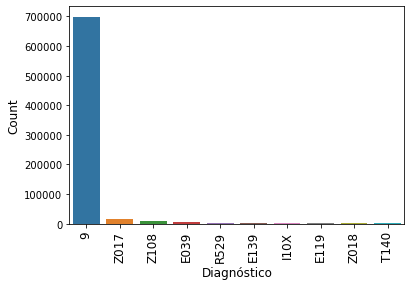

In [178]:
ax = sns.barplot(x=df_diagnosticos10['Diagnostico_Codigo'].value_counts().index,   y=df_diagnosticos10['encounters'],)
plt.xlabel('Diagnóstico', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

Teniendo en cuenta el gráfico anterior de barras, se observa que la gran mayoria de personas se encuentran con el diagnóstico pendiente, después de esta categoria el diagnóstico que más se repite es el Z017 es decir examen de laboratorio.

In [179]:
df2['Numero_Utilizaciones'].value_counts() 

1      703452
2       47393
3        7599
4        4870
5        3763
6        3492
10       3257
7        2902
8        2847
9        2519
11       2344
12       2197
13       1944
14       1736
15       1647
16       1549
17       1275
18       1076
19        859
20        792
21        508
22        407
0         371
23        362
24        269
25        196
26        141
28         87
27         85
30         57
29         48
32         31
31         29
33         15
35         13
36         13
34         11
40          9
37          8
39          7
50          5
38          5
46          4
66          4
41          3
60          3
43          3
42          2
210         2
55          2
44          2
100         1
45          1
70          1
52          1
Name: Numero_Utilizaciones, dtype: int64

In [180]:
# Se obtienen los conteos de cada valor
conteo_valores = df2['Numero_Utilizaciones'].value_counts()

# Primeros 10 valores más comunes 
top_n_valores = conteo_valores.head(10)

# Plotly: Gráfico de barras interactivo
fig = px.bar(top_n_valores, x=top_n_valores.index, y=top_n_valores.values, labels={'x': 'Número de utilizaciones', 'y': 'Frecuencia'}, title='Top 10 cantidad de utilizaciones más comunes')
fig.show()

Según el gráfico anterior se puede ver que lo más común es que las personas que compran el seguro de salud solo lo utilizan una vez.


In [181]:
df2['Valor_Utilizaciones'].value_counts() 

56916     63150
63364     51311
85312     34855
67208     22276
25172     21917
          ...  
357269        1
432010        1
104707        1
619368        1
148702        1
Name: Valor_Utilizaciones, Length: 143939, dtype: int64

In [182]:
max(df2['Valor_Utilizaciones'])

541000683

In [183]:
min(df2['Valor_Utilizaciones'])

2

In [184]:
##Agrupación para ver los 10 diagnosticos que más presentan los usuarios
df_valor = df2.groupby(['Valor_Utilizaciones']).agg(encounters = ('Afiliado_Id', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_valor10 = df_valor.head(10)


In [185]:
df_valor10

Valor_Utilizaciones  encounters
14547                56916       63150
17137                63364       51311
25396                85312       34855
18638                67208       22276
4705                 25172       21917
3844                 21204       18009
29983                97216       13318
8927                 42408       10839
32263               103664        9207
34910               111352        8081

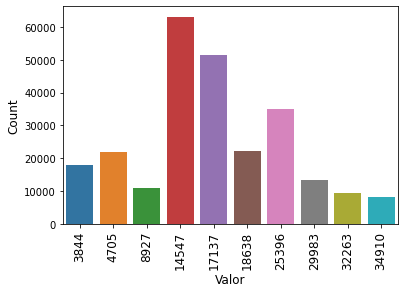

In [186]:
ax = sns.barplot(x=df_valor10['Valor_Utilizaciones'].index,   y=df_valor10['encounters'])
plt.xlabel('Valor', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

Los valores por utilización que más se pagan son 14547 y 17137 respectivamente.

UNIÓN DE LAS BASES DE DATOS

In [187]:
##Renombrar la columna Asegurado_Id de la base Asegurados_Expuestos (df)
df = df.rename(columns={'Asegurado_Id': 'Afiliado_Id'})

In [188]:
base_nueva=pd.merge(df, df1, how = 'left', on = 'Afiliado_Id').merge(df2, how = 'left', on = 'Afiliado_Id')
base_nueva.head()

Afiliado_Id  Poliza_Id FECHA_INICIO FECHA_CANCELACION  FECHA_FIN Sexo_Cd  \
0      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
1      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
2      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
3      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
4     22248110  195410143   2019-01-09        2019-12-31 2019-12-31       M   

    Regional  CANCER  EPOC  DIABETES  HIPERTENSION  ENF_CARDIOVASCULAR  EDAD  \
0  Occidente     0.0   0.0       0.0           0.0                 0.0  53.0   
1  Occidente     0.0   0.0       0.0           0.0                 0.0  53.0   
2  Occidente     0.0   0.0       0.0           0.0                 0.0  53.0   
3  Occidente     0.0   0.0       0.0           0.0                 0.0  53.0   
4     Centro     0.0   0.0       0.0           0.0                 0.0  49.0   

  Fecha_Reclamacion Reclamacion_Cd Diagnostico_Codigo  Numero_Utilizaciones  \
0        2019-09-23            R14               Z108                   1.0   
1        2019-05-09            R10                  9                   1.0   
2        2019-09-24            R14               Z017                   1.0   
3        2019-10-31            R10                  9                   1.0   
4               NaT            NaN                NaN                   NaN   

   Valor_Utilizaciones  
0             686077.0  
1              56916.0  
2             112162.0  
3              56916.0  
4                  NaN

In [189]:
base_nueva.isnull().sum()

Afiliado_Id                  0
Poliza_Id                    0
FECHA_INICIO                 0
FECHA_CANCELACION       511712
FECHA_FIN                    0
Sexo_Cd                    105
Regional                   105
CANCER                     105
EPOC                       105
DIABETES                   105
HIPERTENSION               105
ENF_CARDIOVASCULAR         105
EDAD                       105
Fecha_Reclamacion        67311
Reclamacion_Cd           67311
Diagnostico_Codigo       67311
Numero_Utilizaciones     67311
Valor_Utilizaciones      67311
dtype: int64

In [190]:
base =base_nueva.copy()

In [191]:
base = base.fillna('NaN')

In [192]:
base = base.drop(base[base['Numero_Utilizaciones'] == 'NaN'].index)

In [193]:
base.isnull().sum()

Afiliado_Id                  0
Poliza_Id                    0
FECHA_INICIO                 0
FECHA_CANCELACION       477852
FECHA_FIN                    0
Sexo_Cd                      0
Regional                     0
CANCER                       0
EPOC                         0
DIABETES                     0
HIPERTENSION                 0
ENF_CARDIOVASCULAR           0
EDAD                         0
Fecha_Reclamacion            0
Reclamacion_Cd               0
Diagnostico_Codigo           0
Numero_Utilizaciones         0
Valor_Utilizaciones          0
dtype: int64

In [194]:
base_nueva.shape

(890992, 18)

In [195]:
base.shape

(823681, 18)

In [196]:
base

Afiliado_Id  Poliza_Id FECHA_INICIO FECHA_CANCELACION  FECHA_FIN  \
0           1213170  113307876   2019-01-09               NaT 2019-12-15   
1           1213170  113307876   2019-01-09               NaT 2019-12-15   
2           1213170  113307876   2019-01-09               NaT 2019-12-15   
3           1213170  113307876   2019-01-09               NaT 2019-12-15   
5           7212095  192799506   2019-01-09        2019-12-31 2019-12-31   
...             ...        ...          ...               ...        ...   
890987     48708455  156289019   2019-01-09               NaT 2019-12-31   
890988     30913881  201345473   2019-01-09        2019-12-31 2019-12-31   
890989     30913881  201345473   2019-01-09        2019-12-31 2019-12-31   
890990     30913881  201345473   2019-01-09        2019-12-31 2019-12-31   
890991     30913881  201345473   2019-01-09        2019-12-31 2019-12-31   

       Sexo_Cd   Regional CANCER EPOC DIABETES HIPERTENSION  \
0            M  Occidente    0.0  0.0      0.0          0.0   
1            M  Occidente    0.0  0.0      0.0          0.0   
2            M  Occidente    0.0  0.0      0.0          0.0   
3            M  Occidente    0.0  0.0      0.0          0.0   
5            F  Antioquia    0.0  0.0      0.0          0.0   
...        ...        ...    ...  ...      ...          ...   
890987       F  Occidente    0.0  0.0      0.0          0.0   
890988       F  Occidente    0.0  0.0      0.0          0.0   
890989       F  Occidente    0.0  0.0      0.0          0.0   
890990       F  Occidente    0.0  0.0      0.0          0.0   
890991       F  Occidente    0.0  0.0      0.0          0.0   

       ENF_CARDIOVASCULAR  EDAD Fecha_Reclamacion Reclamacion_Cd  \
0                     0.0  53.0        2019-09-23            R14   
1                     0.0  53.0        2019-05-09            R10   
2                     0.0  53.0        2019-09-24            R14   
3                     0.0  53.0        2019-10-31            R10   
5                     0.0  45.0        2019-09-09            R10   
...                   ...   ...               ...            ...   
890987                0.0  22.0        2019-01-07             R9   
890988                0.0  20.0        2019-02-11            R18   
890989                0.0  20.0        2019-01-12             R9   
890990                0.0  20.0        2019-08-28            R10   
890991                0.0  20.0        2019-10-28             R9   

       Diagnostico_Codigo Numero_Utilizaciones Valor_Utilizaciones  
0                    Z108                  1.0            686077.0  
1                       9                  1.0             56916.0  
2                    Z017                  1.0            112162.0  
3                       9                  1.0             56916.0  
5                       9                  1.0             56916.0  
...                   ...                  ...                 ...  
890987                  9                  1.0             44764.0  
890988                  9                 11.0            186124.0  
890989                  9                  1.0             72912.0  
890990                  9                  2.0            192944.0  
890991                  9                  1.0             72912.0  

[823681 rows x 18 columns]

In [197]:
base=pd.merge(base, df4, how = 'left', on = 'Reclamacion_Cd')

In [198]:
base= base.drop('Reclamacion_Cd', axis=1)

In [199]:
base=pd.merge(base, df3, how = 'left', on = 'Diagnostico_Codigo')

In [200]:
base= base.drop('Diagnostico_Codigo', axis=1)

In [207]:
###Se crea una columna nueva con la duración en meses del seguro haciendo la diferencia entre la fecha_inicio y fecha_fin
## Se usa fecha_fin porque a diferencia de fecha_cancelación no contiene nulos
base['Duracion']= base['FECHA_FIN'].dt.month - base['FECHA_INICIO'].dt.month


In [208]:
base.head()

Afiliado_Id  Poliza_Id FECHA_INICIO FECHA_CANCELACION  FECHA_FIN Sexo_Cd  \
0      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
1      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
2      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
3      1213170  113307876   2019-01-09               NaT 2019-12-15       M   
4      7212095  192799506   2019-01-09        2019-12-31 2019-12-31       F   

    Regional CANCER EPOC DIABETES HIPERTENSION ENF_CARDIOVASCULAR  EDAD  \
0  Occidente    0.0  0.0      0.0          0.0                0.0  53.0   
1  Occidente    0.0  0.0      0.0          0.0                0.0  53.0   
2  Occidente    0.0  0.0      0.0          0.0                0.0  53.0   
3  Occidente    0.0  0.0      0.0          0.0                0.0  53.0   
4  Antioquia    0.0  0.0      0.0          0.0                0.0  45.0   

  Fecha_Reclamacion Numero_Utilizaciones Valor_Utilizaciones  \
0        2019-09-23                  1.0            686077.0   
1        2019-05-09                  1.0             56916.0   
2        2019-09-24                  1.0            112162.0   
3        2019-10-31                  1.0             56916.0   
4        2019-09-09                  1.0             56916.0   

          Reclamacion_Desc                                   Diagnostico_Desc  \
0  EXAMENES DE DIAGNOSTICO  OTROS CONTROLES GENERALES DE SALUD DE RUTINA D...   
1         CONSULTA EXTERNA                              DIAGNÓSTICO PENDIENTE   
2  EXAMENES DE DIAGNOSTICO                              EXAMEN DE LABORATORIO   
3         CONSULTA EXTERNA                              DIAGNÓSTICO PENDIENTE   
4         CONSULTA EXTERNA                              DIAGNÓSTICO PENDIENTE   

   Duracion  
0        11  
1        11  
2        11  
3        11  
4        11

In [213]:
condicion =(base['Reclamacion_Desc'] == 'EXAMENES DE DIAGNOSTICO') &  (base['Diagnostico_Desc'] == 'EXAMEN DE LABORATORIO')
resultado = base[condicion]

# Mostrar el resultado
print(resultado)

        Afiliado_Id  Poliza_Id FECHA_INICIO FECHA_CANCELACION  FECHA_FIN  \
2           1213170  113307876   2019-01-09               NaT 2019-12-15   
69          7650922  198352184   2019-01-09               NaT 2019-12-31   
80         18880499  151979850   2019-01-09               NaT 2019-12-31   
88         23153579  173181468   2019-01-09        2019-12-31 2019-12-31   
116        43196840  159979080   2019-01-09               NaT 2019-12-31   
...             ...        ...          ...               ...        ...   
823601     16860458  169224100   2019-01-09        2019-12-31 2019-12-31   
823611       740921   89614663   2019-01-09        2019-12-31 2019-12-31   
823613       740921   89614663   2019-01-09        2019-12-31 2019-12-31   
823624       740921   89614663   2019-01-09        2019-12-31 2019-12-31   
823667      5867040  122473992   2019-01-09               NaT 2019-12-31   

       Sexo_Cd   Regional CANCER EPOC DIABETES HIPERTENSION  \
2            M  Occident